# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

## Изучение полученных данных

In [1]:
import pandas as pd
from  IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
warnings.filterwarnings('ignore') 
%matplotlib inline

In [3]:
def df_info(df):
    df.info()
    display(df.head(10))
    print(f'Кол-во пропусков: {df.isnull().sum()}')
    print(f'Кол-во дубликатов: {df.duplicated().sum()}')

In [4]:
df = pd.read_csv("/datasets/real_estate_data.csv")

In [5]:
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Кол-во пропусков: total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition    0
dtype: int64
Кол-во дубликатов: 0


*Вот и первый изъян - данные сведены в одну строку, надо бы их разделить, чтобы можно было изучить их*

In [6]:
df = pd.read_csv(r"D:\Яндекс Практикум\Projects\Project 2\real_estate_data.csv", sep = '\t', decimal = ',')
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Кол-во пропусков: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
Кол-во дубликатов: 0


*Ага, уже видим столбцы с пропусками (в 14 столбцах)*

*После обработки данных, нужно будет снова проверить на наличие дубликатов*

### Изучим столбец "ceiling_height"

In [7]:
#Для дальнейшей работы, данный столбец необходимо привести в корректный тип данных
df['ceiling_height'] = df['ceiling_height'].astype('float64')

print(df['ceiling_height'].value_counts().sort_index().tail(20))    #Видим аномальные значения (потолки высотой в 20 и 100 метров)
print()

df['ceiling_height'].describe()

5.0      1
5.2      1
5.3      2
5.5      1
5.6      1
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64



count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

*Есть несколько аномальных значений, скорее всего при подсчете мы их не будем включать в анализ (данные, у которых высота превышает 4 м и данные, где высота меньше 2.5 м), дабы не испортить результаты*

*Пропущенные данные следует оставить, так как эти данные должны даваться изначально, а заменять их ср. или медианой приведет к неккоректным результатам*

### Пропущенные значения в столбце "floors_total"

*Пропущенно 86 строк в столбце "Floors_total". Пропущенные данные заменим значениями столбца 'floor', так как клиенты не заполняли данную вкладку из-за того, что их этаж и так являлся последним*

### Изучим столбец "living_area"

*Нужно узнать есть ли зависимость, между жилым помощением и общей квадратурой. Можно найти сколько в среднем составляет жилая площадь от общей квадратуры, после уже заполнить пропущенные значения*

### Изучим столбец "is_apartment"

*В данном столбце отсутствующие значения скорее всего нужно заменить на False, так как заполняющие анкету специально не указали данный раздел, так как это квартира, а не апартаменты*

### Изучим столбец 'kitchen_area'

In [8]:
display(df[(df['studio'] == True) & (df['kitchen_area'].isnull())])
display(df[(df['studio'] == False) & (df['kitchen_area'].isnull())])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,NaN,24.0,15.5,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00000000000003
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.1,2017-12-01T00:00:00,0,2.75,25.0,17.5,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.0,2017-06-07T00:00:00,0,2.70,9.0,12.0,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.0,2017-12-17T00:00:00,0,NaN,25.0,18.2,5,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.0,2017-10-26T00:00:00,0,2.70,19.0,18.0,10,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.0,2017-09-01T00:00:00,0,NaN,25.0,18.0,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.0,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001


*Можно видеть следующую картину: из 2278 строк 149 строк это студии (значит площадь кухни, где есть пропуски, заполняем 0), а 2129 строк заполняем также, как со столбцем 'living_room'*

### Изучим столбец 'balcony'

*Пустующие значения можно заменить на 0, так как скорее всего их просто не указали из-за отсутствия балконов в квартире*

### Изучим столбец 'locality_name'

In [9]:
print(df['locality_name'].sort_values().unique())
print()
print(df['locality_name'].value_counts())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

*Оставим пустующие значения, так как данные должны даваться изначально. Также видим дубликаты слов Е и Ё. Присутствуют дубликаты с Кудрово и Мурино. Нужно будет вытащить основу. Заменим слова "поселок городского типа" и *городской поселок" на "пгт"

### Изучим столбец 'airports_nearest'

In [10]:
display(df[(df['airports_nearest'].isnull()) & (df['locality_name'] == 'Санкт-Петербург')])
display(df[(df['airports_nearest'].isnull()) & (df['locality_name'] != 'Санкт-Петербург')])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,20,4200000.0,38.3,2019-04-16T00:00:00,1,2.60,16.0,19.8,10,NaN,...,10.1,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,11,9899000.0,101.0,2018-12-12T00:00:00,3,3.00,5.0,62.0,3,NaN,...,15.0,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,18,18700000.0,109.7,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,NaN,...,15.3,1.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,112.0
742,7,37000000.0,161.0,2016-05-22T00:00:00,3,NaN,9.0,84.0,8,NaN,...,NaN,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,19,130000000.0,431.0,2017-10-02T00:00:00,7,3.70,8.0,220.0,5,NaN,...,20.0,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0
22554,5,3415000.0,31.65,2019-04-16T00:00:00,1,NaN,24.0,NaN,14,NaN,...,8.7,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22628,8,8600000.0,74.9,2019-03-14T00:00:00,3,3.00,5.0,53.2,4,NaN,...,8.0,1.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22790,8,5600000.0,47.0,2017-09-27T00:00:00,1,NaN,23.0,21.0,7,NaN,...,11.0,1.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,10.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,NaN,5.0,30.0,5,NaN,...,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00000000000001
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,NaN,...,11.0,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,...,5.5,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Что делать с аэропортом, если квартира находится в городе, пока неизвестно. Но, вот если это поселок, то пропущенные данные заполнять не стоит, так как наврятли у поселка будет свой аэропорт*

### Изучим столбец 'cityCenters_nearest'

*Из-за невозможности найти одинаковые здания, данный столбец с его пропусками не изменять*

### Изучим столбцы 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest'

In [11]:
display(df[df['parks_around3000'].isnull() & df['parks_nearest'].isnull()])
display(df[df['parks_around3000'].notnull() & df['parks_nearest'].isnull()])
display(df[df['ponds_around3000'].isnull() & df['ponds_nearest'].isnull()])
display(df[df['ponds_around3000'].notnull() & df['ponds_nearest'].isnull()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,NaN,5.0,30.0,5,NaN,...,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00000000000001
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,NaN,...,11.0,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,...,5.5,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.6,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.0,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.000000000000004


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,NaN,5.0,30.0,5,NaN,...,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00000000000001
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,NaN,...,11.0,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,...,5.5,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.6,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.0,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.000000000000004


*Пропущенные значения в столбцах 'parks_around3000' и 'ponds_around3000' следует заполнить 0, так как в пределах 3000 нет никаких парков. Пропуски в столбцах 'parks_nearest' и 'ponds_nearest' трогать не будем, так как нет возможности определить есть ли вообще по близости парки и пруда*

### Изучим столбец 'days_exposition'

*Пустующие значения свидетельствуют о том, что объявление по данным квартирам еще актуальным, поэтому их затрагивать не нужно*

### Изучим столбец 'rooms'

In [12]:
display(df.query('rooms == 0'))
df['rooms'].describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,NaN,24.0,15.5,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00000000000003
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.4,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.0,2017-09-01T00:00:00,0,NaN,25.0,18.0,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.7,2017-09-28T00:00:00,0,NaN,24.0,18.0,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.0,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.0,2017-11-11T00:00:00,0,NaN,9.0,18.0,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

*0 значения следует заменить на 1, чтобы показать, что это 1-комнатные квартиры или студии. 19 квартир тоже многовато как-то*

### Вывод

*Были найдены отсутствующие значения в 14 столбцах.*

*В столбах "ceiling_heaight", "floors_total", "living_area", "airports_nearest" нужно понять природу пропусков. Возможно данные были потеряны из-за ошибок при переносе, либо не указаны заполняющими эти данные. В ходе проперки будет понятно, какие данные можно будет заполнить, а какие следует оставить пропущенными*

*Пропуски в столбце "kitchen _area" скорее всего связаны с тем, что раз кваритара или апартаменты являются студией, то кухни просто и нет*

*Отсутствующие значения в столбце "balcony" связаны скорее всего с тем, что балкона просто нет, поэтому в этом столбце пропущенные данные будут заменены на 0*

*Пропуски в столбце "is_apartment" скорее всего связаны с тем, что раз это не апартаменты, то в объявлении даже не указали его, как с балконом. Поэтому пропущенные значения следует заменить на False*

*В столбе "locality_name" заполнить пустующие значения не предоставляется возможности из-за нехватки информации. Невозможно будет провести закономерность. 49 строк из 23699 не повлияют на анализ. Также были замечены повторения (Например данные были записаны как: "Деревня Кудрово" и просто "Кудрово" или "поселок" и "посёлок (через ё)". Нужно будет выписать только основные названия без повторений*

*В столбах "parks_around3000" и "parks_nearest", "ponds_around3000" и "ponds_nearest"  заполнить пустующие значения можно с помощью взаимосвязи между ними. Скорее всего пустующие значения в столбцах могут быть связаны с тем, что рядом просто и нет ни парков, ни прудов*

*В столбце "days_exposition" заполнить пустующие данные не стоит, так как скорее всего они связаны с тем, что объявление еще актуально*

***Основной проблемой этих данных является отсутствие названия ЖК, № дома, ID здания и тп. Наличие этих сведений позволило бы сгруппировать данные и по ним указать уже кол-во этажей, расстояние от аэропорта, парка или пруда, название населенного пункта***

### Шаг 2. Предобработка данных

*Изменим тип данных, где нет пропусков*

In [13]:
df['last_price'] = df['last_price'].astype('float32').astype('Int64')

df['total_area'] = df['total_area'].astype('float64')

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df['airports_nearest'] = df['airports_nearest'].astype('float64')

df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('float64')

df['days_exposition'] = df['days_exposition'].astype('float32').astype('Int64')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  object        
 7   living_area           21796 non-null  object        
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  object        
 13  balcony         

*Убрал код с заполнение пропусков в столбце "Высота потолков". Согласен, все же не стоит заполнять его "своими" данными*

### Заполним пропуски в столбце "living_area"

In [14]:
df['living_area'] = df['living_area'].astype('float64') #Изменим тип данных для дальнейшей работы с ними

print(f"Корреляция жилой площади и общей площади: {df['living_area'].corr(df['total_area'])}")

df['living/total_area'] = df['living_area'] / df['total_area']
print('Средняя: {}'.format(df['living/total_area'].mean()))
print('Медиана: {}'.format(df['living/total_area'].median()))
display(df.loc[:, ['total_area', 'living_area', 'living/total_area']])

Корреляция жилой площади и общей площади: 0.9395373338721495
Средняя: 0.5647655216993298
Медиана: 0.5678598992678503


,total_area,living_area,living/total_area
0,108.00,51.0,0.472222
1,40.40,18.6,0.460396
2,56.00,34.3,0.612500
3,159.00,NaN,NaN
4,100.00,32.0,0.320000
...,...,...,...
23694,133.81,73.3,0.547792
23695,59.00,38.0,0.644068
23696,56.70,29.7,0.523810
23697,76.75,NaN,NaN


*Результат показал, что зависимость присутствует. Также видно, что средняя и медиана одинаковы, поэтому отсутствующие значения можно заполнить по этим отношениям*

In [15]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * df['living/total_area'].median())

df.drop(['living/total_area'], axis='columns', inplace=True) #уберем данный столбец, так как он уже не пригодиться

print('Пропущенные значения в столбце "living_room": {}'.format(df['living_area'].isnull().sum()))

Пропущенные значения в столбце "living_room": 0


### Заполним пропуски в столбце "is_apartment"

In [16]:
print(df['is_apartment'].value_counts())
print()

df['is_apartment'] = df['is_apartment'].fillna(False)
print('Пропущенные значения в столбце "is_apartment": {}'.format(df['is_apartment'].isnull().sum()))
print()

print(df['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64

Пропущенные значения в столбце "is_apartment": 0

False    23649
True        50
Name: is_apartment, dtype: int64


*Здорово, исправили пустующие значения на False, теперь можно поменять тип данных на bool*

In [17]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  object        
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  object        
 13  balcony         

### Корректировка данных "locality_name"

In [18]:
localities = df['locality_name'].sort_values().unique()

def normalize_locality_name(value):
    if str(value) == 'nan':
        return
    
    localities = ['Мурино', 'Кудрово']
    words = value.split(' ')
    
    if words[0] == 'посёлок':
        words[0] = 'поселок'
    
    if words[0] == 'городской посёлок':
        words[0] == 'гпт'
    
    if words[0] == 'городской поселок':
        words[0] == 'гпт'
    
    if words[0] == 'посёлок городского типа':
        words[0] == 'гпт'
    
    if words[0] == 'поселок городского типа':
        words[0] == 'гпт'
    
    for locality in localities:
        if locality in words:
            return locality
        
    return ' '.join(words)

df['locality_name'] = df['locality_name'].apply(normalize_locality_name)

df['locality_name'].value_counts()

Санкт-Петербург     15721
Мурино                590
Кудрово               472
поселок Шушары        440
Всеволожск            398
                    ...  
деревня Щеглово         1
поселок Пчевжа          1
поселок Рабитицы        1
поселок Левашово        1
поселок Калитино        1
Name: locality_name, Length: 329, dtype: int64

*Исправили, видим, что у нас имеются 329 населенных пунктов, а не 364*

### Заполним пропуски в столбце "kitchen_area"

In [19]:
df['kitchen_area'] = df['kitchen_area'].astype('float64')

df.loc[df['studio'] == True, 'kitchen_area'] = 0

df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

df['kitchen_area'] = df.loc[df['studio'] == False, 'kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * df['kitchen_area_ratio'].mean())

df.drop(['kitchen_area_ratio'], axis = 'columns', inplace = True) #уберем данный столбец, так как он уже не пригодиться

print('Пропущенные значения в столбце "kitchen_area": {}'.format(df['kitchen_area'].isnull().sum()))

Пропущенные значения в столбце "kitchen_area": 0


*Заполнини пропуски по следующем выводам: если эта студия, то пропуск заполняли 0, если же это не студия - то общую площадь умножали на среднюю величинку, которая кухня занимает*

### Заполним пропуски в столбце "balcony"

In [20]:
df['balcony'] = df['balcony'].fillna(0)
print('Пропущенные значения в столбце "balcony": {}'.format(df['balcony'].isnull().sum()))
df['balcony'] = df['balcony'].astype('float32').astype('Int64')

Пропущенные значения в столбце "balcony": 0


### Заполним пропуски в столбцах "parks_around3000" и "ponds_around3000"

In [21]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

df['parks_around3000'] = df['parks_around3000'].astype('float32').astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('float32').astype('Int64')
df['parks_nearest'] = df['parks_nearest'].astype('float64')
df['ponds_nearest'] = df['ponds_nearest'].astype('float64')

print('Пропущенные значения в столбце "parks_around3000": {}'.format(df['parks_around3000'].isnull().sum()))
print()
print('Пропущенные значения в столбце "ponds_around3000": {}'.format(df['ponds_around3000'].isnull().sum()))

Пропущенные значения в столбце "parks_around3000": 0

Пропущенные значения в столбце "ponds_around3000": 0


### Заполним пропуски в столбце "floors_total"

In [22]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'] = df['floors_total'].astype('float32').astype('Int64')

### Заменим 0 в столбце "rooms"

In [23]:
df['rooms'] = df['rooms'].replace(0, 1)

### Контрольный обзор пропусков

In [24]:
print(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Проверим на наличие дубликатов

In [25]:
display(df[df.duplicated(subset = ['floors_total']) & df.duplicated(subset = ['parks_nearest']) & df['parks_nearest'].notnull() & df.duplicated(subset = ['airports_nearest']) & df['airports_nearest'].notnull() & df.duplicated(subset = ['ponds_nearest']) & df['ponds_nearest'].notnull()].sort_values(by = 'floors_total'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22037,15,10900000,145.0,2017-04-17,2,3.50,2,39.000000,2,False,...,10.000000,0,Пушкин,15337.0,27490.0,3,216.0,3,153.0,188
8822,14,49968900,398.0,2017-07-12,9,3.00,2,160.100000,1,False,...,41.000000,0,Санкт-Петербург,17720.0,16722.0,3,471.0,2,440.0,471
21634,5,2690000,28.0,2017-05-23,1,3.80,2,14.500000,1,False,...,5.000000,0,Пушкин,13985.0,26139.0,1,484.0,2,624.0,27
15151,15,88000000,400.0,2019-03-27,9,2.50,2,250.000000,1,False,...,50.000000,0,Санкт-Петербург,24395.0,2725.0,2,315.0,1,578.0,<NA>
12466,11,15000000,89.6,2017-01-31,3,NaN,3,57.000000,3,False,...,13.500000,0,Пушкин,15065.0,27218.0,3,317.0,3,509.0,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13221,10,5199000,36.0,2018-10-27,1,2.65,26,20.442956,22,False,...,6.698179,1,Санкт-Петербург,49058.0,14883.0,1,265.0,1,572.0,15
6522,14,12000000,116.0,2017-09-13,3,2.65,27,70.000000,17,False,...,20.000000,0,Санкт-Петербург,15916.0,8180.0,1,489.0,2,830.0,151
14186,20,10860000,91.0,2018-06-18,3,2.60,28,47.000000,23,False,...,16.000000,0,Санкт-Петербург,15916.0,8180.0,1,489.0,2,830.0,70
12950,17,5950000,45.0,2018-02-01,1,2.50,28,19.000000,18,False,...,13.000000,0,Санкт-Петербург,15916.0,8180.0,1,489.0,2,830.0,430


*Дубликатов все же нет, так же не получилось найти одинаковые дома. Отличия все же между объявлениями есть*

### Вывод

#### *Всевозможные и логичные пропуски мы заменили:*
1. *Жилая площадь (выявили среднюю долю жилой площади от общей квадратуры, после находили саму жилую площадь)*

2. *Вначале заполнили пропуски в столбце 'is_apartment' и только после перевели данный столбец в тип данных 'bool', дабы пропущенные значения не перевелись в True сами*

3. *Провели корректировку данных в столбце 'locality_name'. Заменили все Ё на Е, вытащили по отдельности Мурино и Кудрово. Заменили все поселки городского типа и городские поселки на аббревиатуру пгт*

4. *По аналогии с жилой площадью нашли площадь кухни. Если это была студия, то пропуск заменяли на 0*

5. *Пропущенные значения в столбец 'balcony' объяснялось тем, что балкон в комнате не присутствует, поэтому пропуски заполняли 0*

6. *Пропуски в столбцах парки и пруды в пределах 3000 м заполняли 0, так как пропуски объяснялись тем, что парков и прудов просто нет*

### Шаг 3. Посчитайте и добавьте в таблицу

### Добавим столбец с ценой за 1 кв.м.

In [26]:
df['price_per_area'] = (df['last_price'] / df['total_area'])
df['price_per_area'] = df['price_per_area'].astype('int')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000


### Добавим столбец с указанием дня недели, месяца и года публикации

In [27]:
df['weekday'] = df['first_day_exposition'].dt.weekday
"""
df.loc[df['weekday'] == 0, 'weekday'] = 'Monday'
df.loc[df['weekday'] == 1, 'weekday'] = 'Tuesday'
df.loc[df['weekday'] == 2, 'weekday'] = 'Wednesday'
df.loc[df['weekday'] == 3, 'weekday'] = 'Thursday'
df.loc[df['weekday'] == 4, 'weekday'] = 'Friday'
df.loc[df['weekday'] == 5, 'weekday'] = 'Saturday'
df.loc[df['weekday'] == 6, 'weekday'] = 'Sunday'
"""

df['month'] = df['first_day_exposition'].dt.month
"""
df.loc[df['month'] == 1, 'month'] = 'January'
df.loc[df['month'] == 2, 'month'] = 'February'
df.loc[df['month'] == 3, 'month'] = 'March'
df.loc[df['month'] == 4, 'month'] = 'April'
df.loc[df['month'] == 5, 'month'] = 'May'
df.loc[df['month'] == 6, 'month'] = 'June'
df.loc[df['month'] == 7, 'month'] = 'July'
df.loc[df['month'] == 8, 'month'] = 'August'
df.loc[df['month'] == 9, 'month'] = 'September'
df.loc[df['month'] == 10, 'month'] = 'October'
df.loc[df['month'] == 11, 'month'] = 'November'
df.loc[df['month'] == 12, 'month'] = 'December'
"""

df['year'] = df['first_day_exposition'].dt.year

#df['exposition_weekday_month_year'] = df['weekday'] + '-' + df['month'] + '-' + df['year'].map(str)

#df.drop(['weekday', 'month', 'year'], axis = 'columns', inplace = True)

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1,482.0,2,755.0,<NA>,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,18603.0,0,NaN,0,NaN,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,13933.0,1,90.0,2,574.0,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,6800.0,2,84.0,3,234.0,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098.0,2,112.0,1,48.0,121,100000,1,6,2018


### Добавим столбец с указанием этажа

In [28]:
def floor(row):
    floor_num = row['floor']
    floor_max = row['floors_total']
    if floor_num == 1:
        return 'Первый этаж'
    if floor_num == floor_max:
        return 'Последний этаж'
    else:
        return 'Другой этаж'


df['floor_type'] = df.apply(floor, axis = 1)

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482.0,2,755.0,<NA>,120370,3,3,2019,Другой этаж
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,0,NaN,81,82920,1,12,2018,Первый этаж
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,1,90.0,2,574.0,558,92785,3,8,2015,Другой этаж
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,2,84.0,3,234.0,424,408176,4,7,2015,Другой этаж
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112.0,1,48.0,121,100000,1,6,2018,Другой этаж


### Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей

In [29]:
df['living/total_areas_ration'] = df['living_area'] / df['total_area']
df['kitchen/total_areas_ration'] = df['kitchen_area'] / df['total_area']

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,floor_type,living/total_areas_ration,kitchen/total_areas_ration
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,<NA>,120370,3,3,2019,Другой этаж,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81,82920,1,12,2018,Первый этаж,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558,92785,3,8,2015,Другой этаж,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,3,234.0,424,408176,4,7,2015,Другой этаж,0.567860,0.186061
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,100000,1,6,2018,Другой этаж,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим диаграммы для каждого параметра

In [30]:
# Функция для поиска нижних и верхних границ разброса
def levels(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    low_level = Q1 - 1.5*IQR
    high_level = Q3 + 1.5*IQR
    return low_level, high_level

In [31]:
# Функция для построения графика распределения:
def hist(df, column, title, bins, *args, kde=True):
    
    plt.figure(figsize=(16, 12))
    plt.title(title, fontsize=16)
    sns.distplot(df[column], bins=bins, kde=kde)
    plt.xlabel(args[0])
    plt.ylabel(args[1])
    plt.grid(True)

### Площадь

In [32]:
low_S, high_S = levels(df['total_area'])

In [33]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

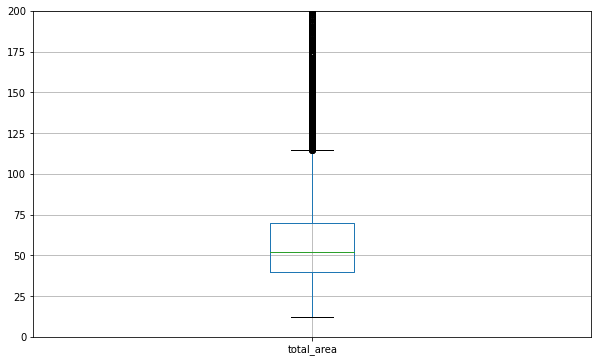

In [34]:
plt.figure(figsize=(10,6))
plt.ylim(0, 200)
df.boxplot('total_area')

*Большая часть значений лежит в диапазоне до 70 кв.м.*
*Первый квартиль находится на уровне 40 кв.м.*
*минимальное значение 12 кв.м..*
*Верхний ус заканчивается около 115 кв.м.*
*Все, что лежит за ориентировочной границей нормального размаха, считаем выбросом*
*Таким образом, нам нужен будет следующией диапазон значений: 12 – 115 кв.м.*

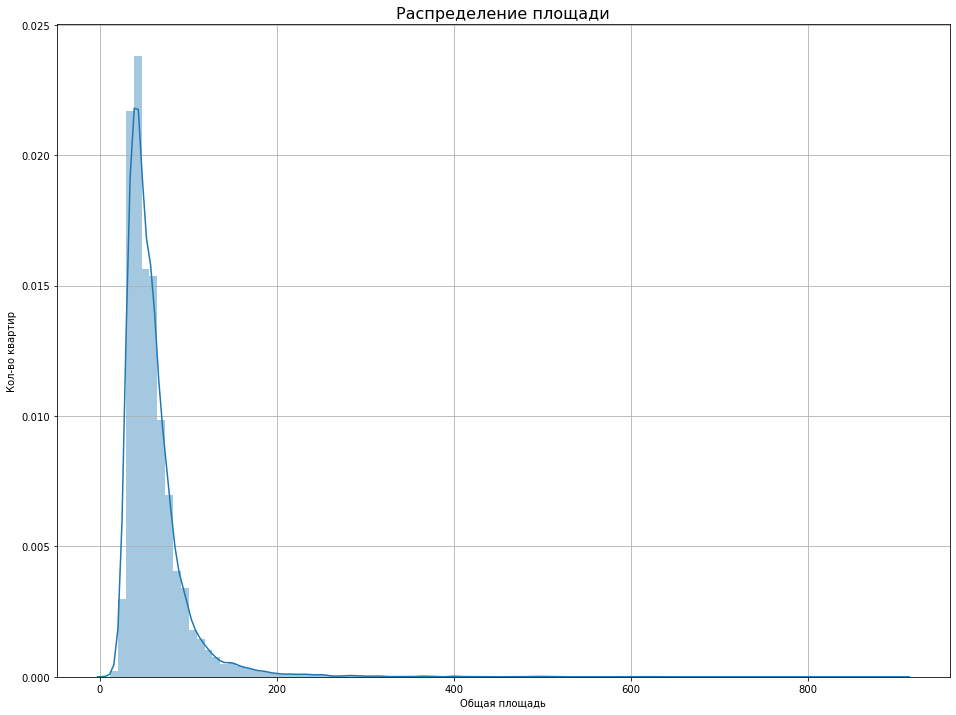

In [35]:
hist(df, 'total_area','Распределение площади', 100, 'Общая площадь', 'Кол-во квартир')

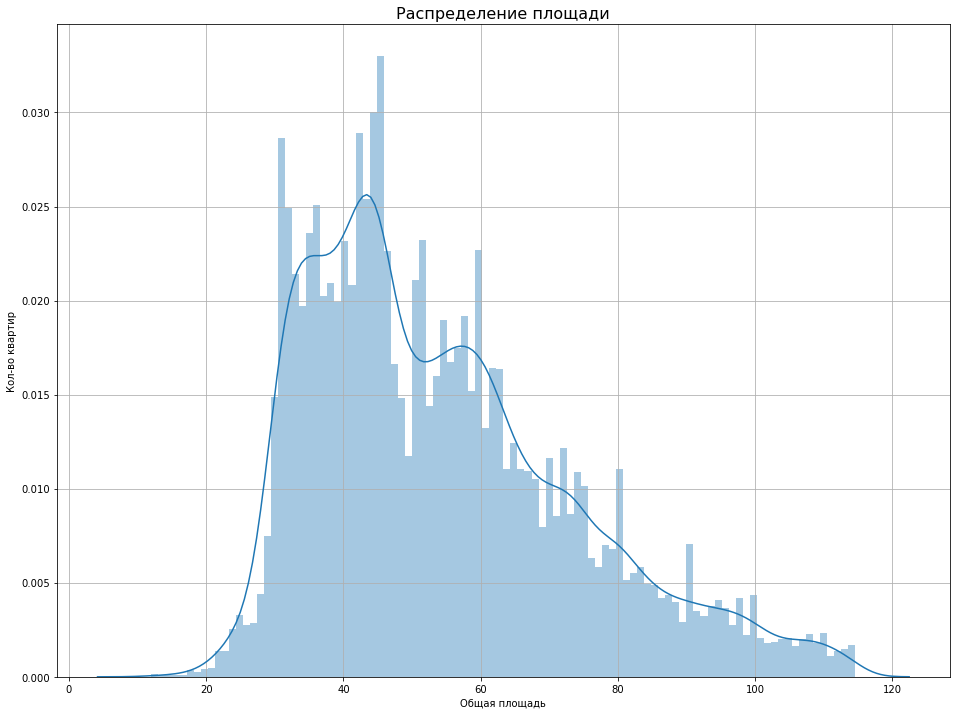

In [36]:
hist(df.query('total_area >= @low_S and total_area <= @high_S'), 'total_area', 'Распределение площади', 100, 'Общая площадь', 'Кол-во квартир')

### Цена

*Ожидается, что цена будет сильно отличаться в зависимости от населенного пункта. В Санкт-Петербурге в среднем должно быть самое дорогое жилье, а в деревнях и поселках – намного дешевле.*

In [37]:
#так как данные большие, давайте все числа приведем к тысячным

df['last_price_1000'] = df['last_price'] / 1000

low_P, high_P = levels(df['last_price_1000'])

df['last_price_1000'].describe()

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price_1000, dtype: float64

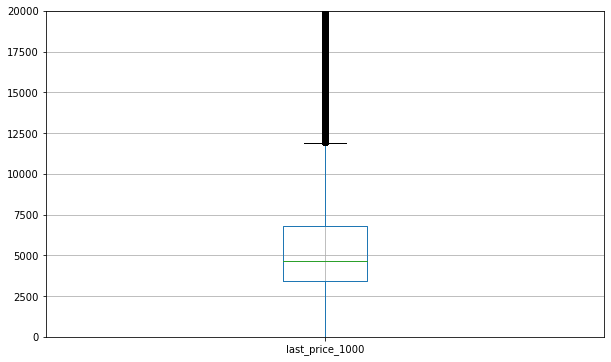

In [38]:
plt.figure(figsize=(10,6))
plt.ylim(0, 20000)
df.boxplot('last_price_1000', figsize = (10, 6))
plt.show()

*Большая часть значений лежит в диапазоне до 7 млн*
*Первый квартиль на уровне 3.4 млн.*
*Минимум равен 1.2 тыс, в то время как средняя стоимость недвижимости – 6.5 млн. Это выглядит подозрительным. Проверим данные*

In [39]:
susp_cheap = df.query('last_price_1000 < 4650')
susp_cheap.sort_values('last_price_1000').head()[['locality_name', 'last_price_1000', 'total_area']]

,locality_name,last_price_1000,total_area
8793,Санкт-Петербург,12.19,109.0
14911,поселок станции Свирь,430.00,54.0
17456,Сланцы,430.00,30.4
16274,деревня Старополье,440.00,40.0
17676,деревня Ям-Тесово,450.00,36.5


*Явно маленькое значение, да и еще со 109 кв.м., данную квартиру включать в анализ не будем*

*Смоимость в полмиллиона для деревней выглядит правдивой.*

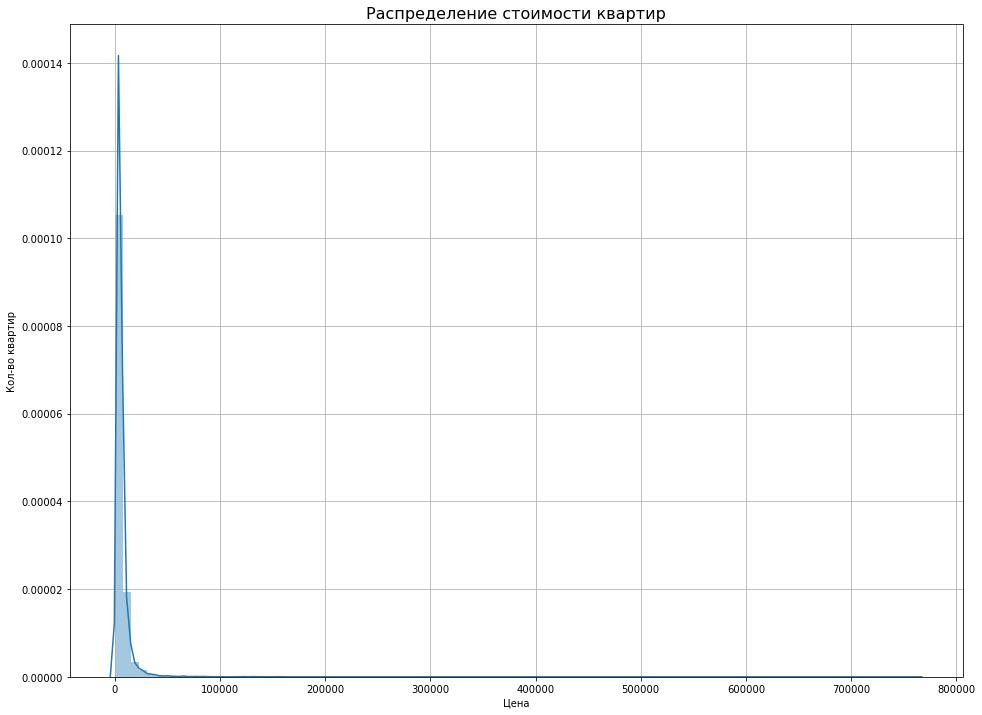

In [40]:
hist(df, 'last_price_1000', 'Распределение стоимости квартир', 100, 'Цена', 'Кол-во квартир')

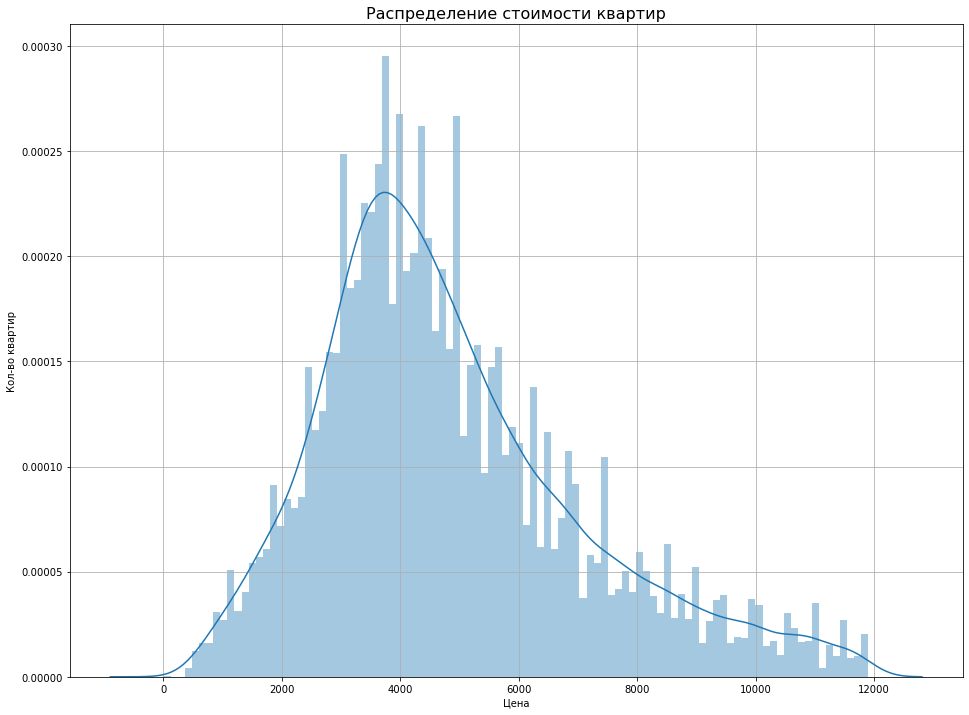

In [41]:
hist(df.query('last_price_1000 >= @low_P and last_price_1000 <= @high_P'), 'last_price_1000','Распределение стоимости квартир', 100, 'Цена', 'Кол-во квартир')

### Число комнат

In [42]:
low_R, high_R = levels(df['rooms'])

In [43]:
df['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

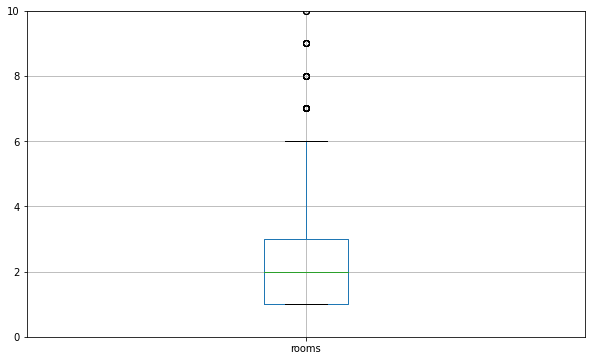

In [44]:
plt.figure(figsize=(10,6))
plt.ylim(0, 10)
df.boxplot('rooms', figsize=(10, 6))
plt.show()

*Большая часть значений лежит в диапазоне до 3х комнат*

*Первый квартиль находится на уровне 1 комнаты*

*Верхний ус заканчивается на 6*

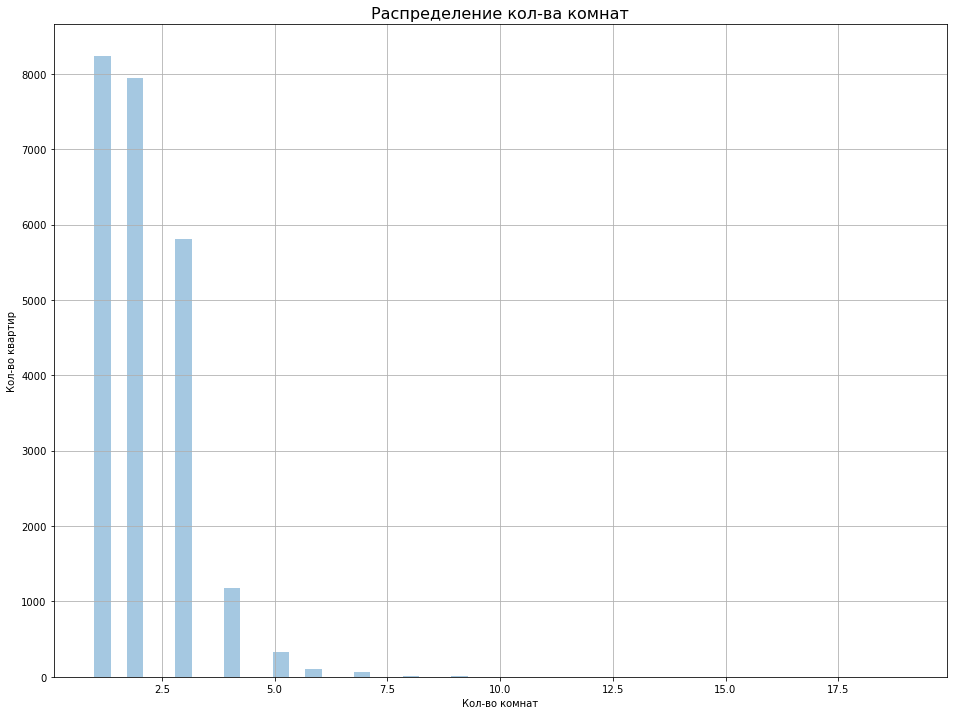

In [45]:
hist(df, 'rooms', 'Распределение кол-ва комнат', 50, 'Кол-во комнат', 'Кол-во квартир', kde=False)

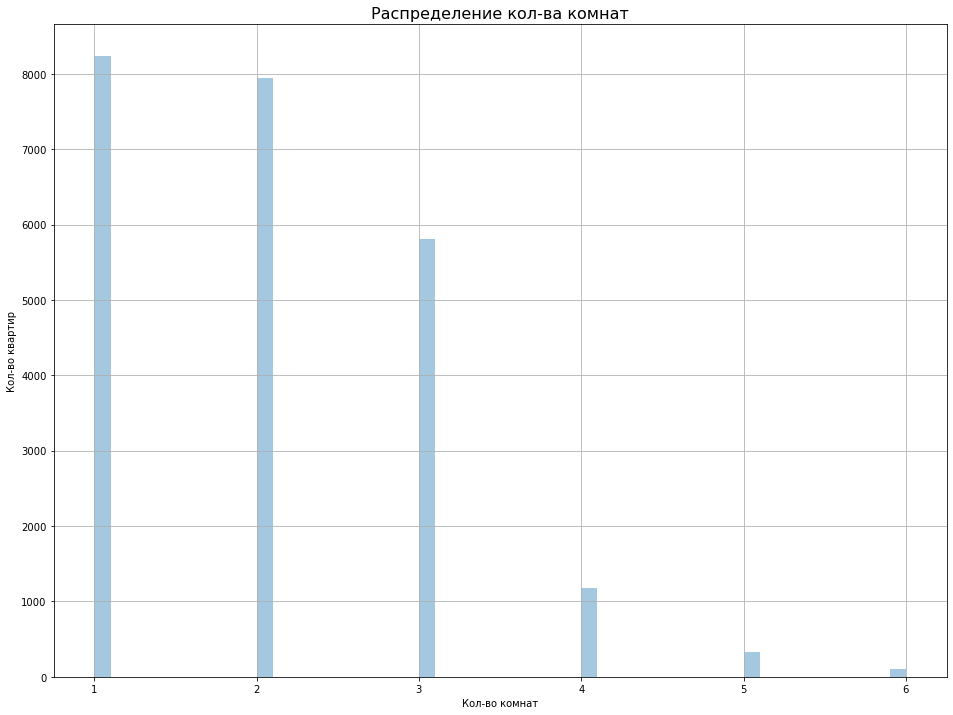

In [46]:
hist(df.query('rooms >= @low_R and rooms <= @high_R'), 'rooms', 'Распределение кол-ва комнат', 50, 'Кол-во комнат', 'Кол-во квартир', kde=False)

### Высота потолков

In [47]:
low_H, high_H = levels(df['ceiling_height'])

In [48]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

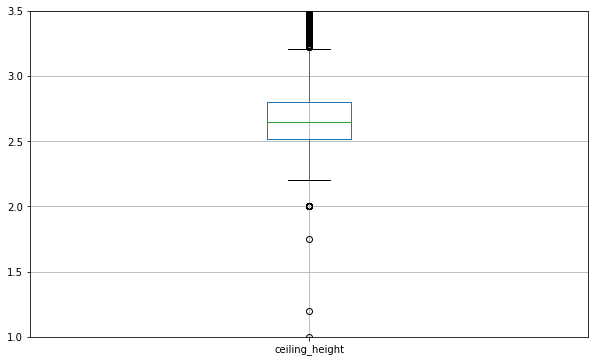

In [49]:
plt.figure(figsize=(10, 6))
plt.ylim(1, 3.5)
df.boxplot('ceiling_height')
plt.show()

*Большая часть значений лежит в диапазоне до 2.8 м комнат*
*Первый квартиль находится на уровне 2.5 м.*
*Нижний "ус" упирается в 2.2 м (Не уверен, что это соответствует ГОСТу)*
*Верхний ус заканчивается около 3.3 м.*
*В среднем, параметр высоты потолков должен колебаться в пределах 2.4 - 3.2 м. Минимальная высота потолка определяется строительными нормами и правилами обычно как 2.5 м.*

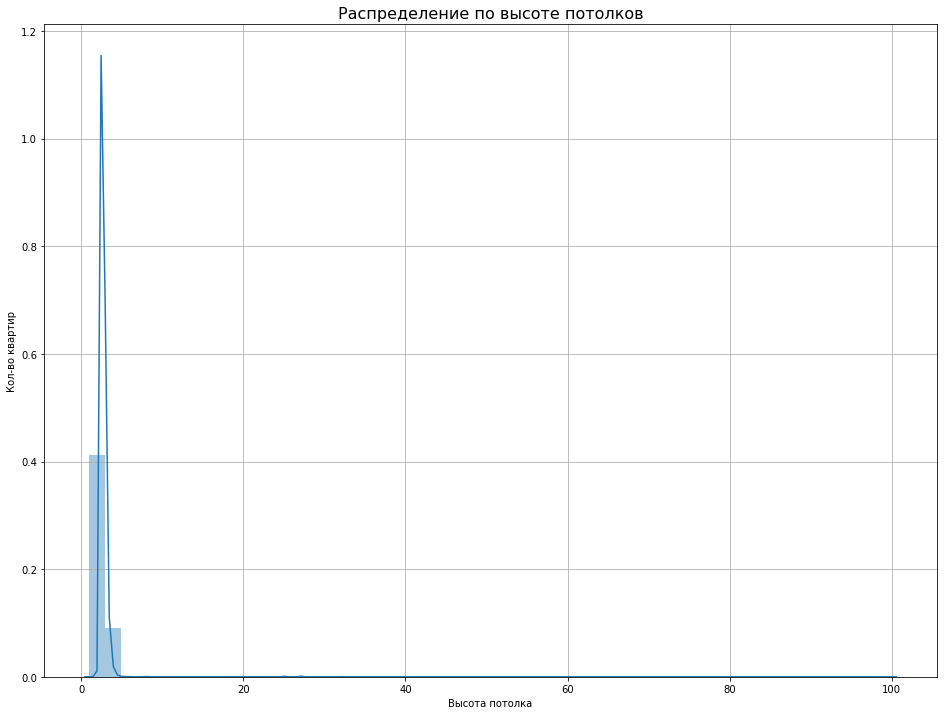

In [50]:
hist(df, 'ceiling_height', 'Распределение по высоте потолков', 50, 'Высота потолка', 'Кол-во квартир')

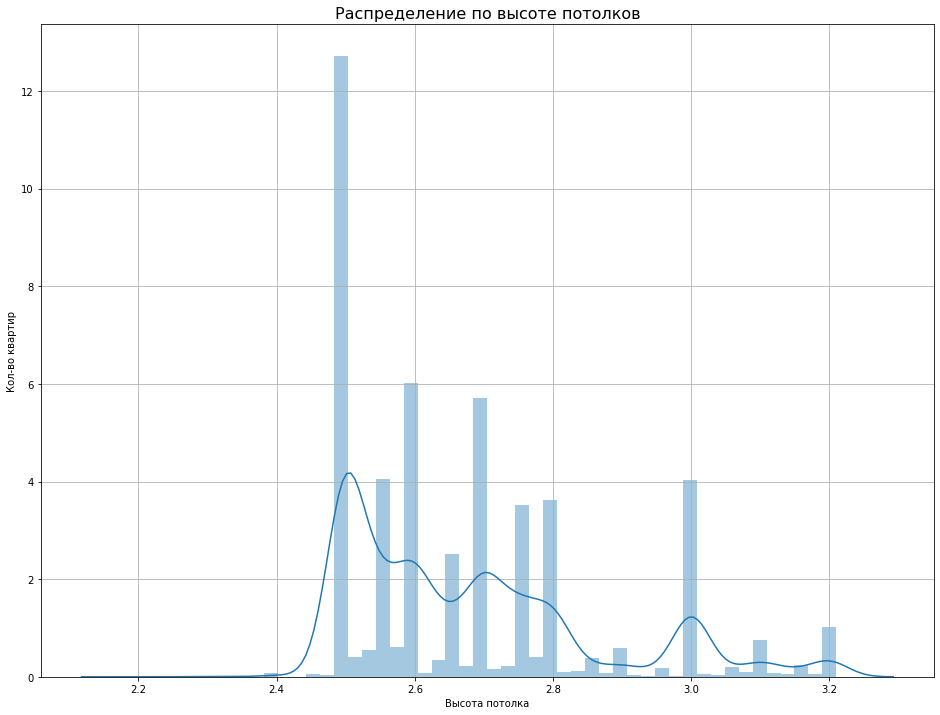

In [51]:
hist(df.query('ceiling_height >= @low_H and ceiling_height <= @high_H'), 'ceiling_height', 'Распределение по высоте потолков', 50, 'Высота потолка', 'Кол-во квартир')

### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [52]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

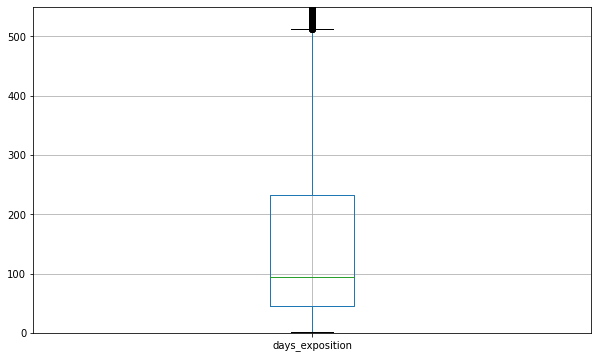

In [53]:
plt.figure(figsize=(10,6))
plt.ylim(0, 550)
df.boxplot(column='days_exposition')
plt.show()

45    880
60    538
7     234
30    208
90    204
Name: days_exposition, dtype: Int64



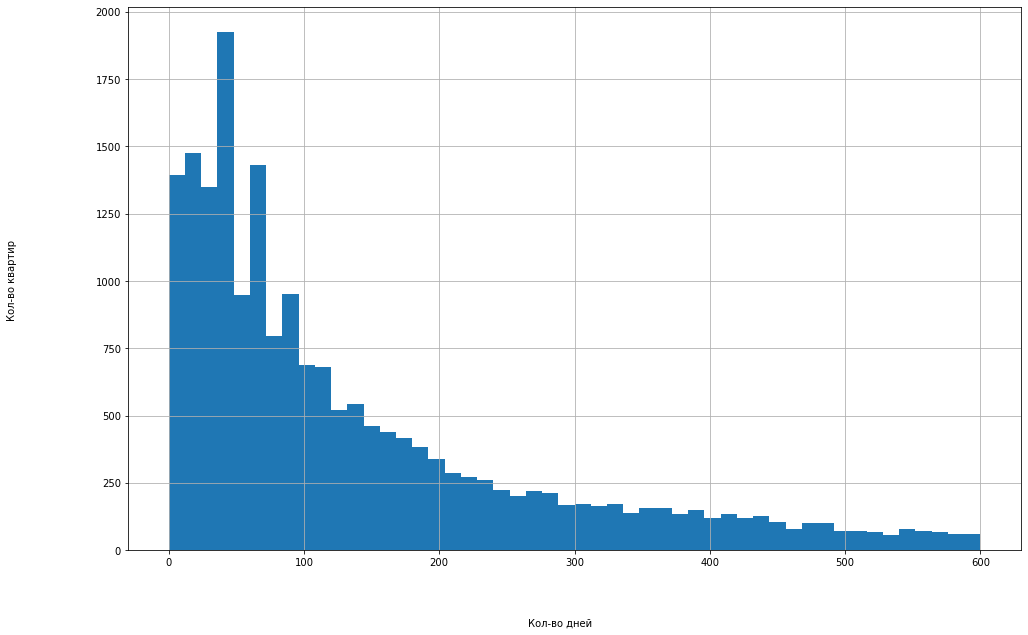

Среднее время (дни), на которое уходит продажа квартиры - 180
Медианное время (дни), на которое уходит продажа квартиры - 95
(0.999, 35.0]      4218
(287.0, 1580.0]    4102
(67.0, 135.0]      4102
(135.0, 287.0]     4078
(35.0, 67.0]       4018
Name: days_exposition, dtype: int64


In [54]:
fig, ax = plt.subplots()

print(df['days_exposition'].value_counts().head())
print()
df['days_exposition'].hist(bins = 50, range = (0, 600), figsize = (16, 10))
fig.text(0.5, 0.02, 'Кол-во дней', ha='center')
fig.text(0.02, 0.5, 'Кол-во квартир', va='center', rotation='vertical')
plt.show()
print('Среднее время (дни), на которое уходит продажа квартиры - {}'.format(int(df['days_exposition'].mean())))
print('Медианное время (дни), на которое уходит продажа квартиры - {}'.format(int(df['days_exposition'].median())))

b = pd.qcut(df['days_exposition'], 5)
print(b.value_counts())

*Большую часть занимают объявления, у которых время продажи составило в пределах 1 - 35 дней (%31 или 6 404 объявлений). Среднее значение показывает, что квартира стоит в среднем 180 дней, медианное значение показывает, что длительность составляет 95 дней. Оптимальным временем продажи является то время, когда оно составляет 1.5 - 2 месяца, быстрым, если квартира продалась за неделю, очень долгим сроком является - 287+ дней*

### Уберем редкие и выбивающиеся значения. Опишим, какие особенности обнаружили.

*Уберем данные и оставим только те, которые рассмотрели выше*

In [55]:
print('Кол-во данных до удаления: {}'.format(len(df)))
print()

df_edited_v1 = df.copy()
df_edited_v1 = df_edited_v1.query('total_area >= @low_S and total_area <= @high_S')
#df_edited_v1 = df_edited_v1.query('ceiling_height >= @low_H and ceiling_height <= @high_H') #если мы не трогаем эту строку, то сохраняем 9 тыс строк данных, но там данные имеют нелогические значения, которые не соответствуют ГОСТу
df_edited_v1 = df_edited_v1.query('last_price_1000 >= @low_P and last_price_1000 <= @high_P')
df_edited_v1 = df_edited_v1[df_edited_v1['locality_name'].notnull()] # Убирать одназначно, так как смотреть квартиру, не зная в каком она городе дело такое себе) 49 строк всего убрали
df_edited_v1 = df_edited_v1.reset_index(drop = True)
df_edited_v1.info()
print()

print('Кол-во данных после удаления: {}'.format(len(df_edited_v1)))

Кол-во данных до удаления: 23699

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21439 entries, 0 to 21438
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                21439 non-null  int64         
 1   last_price                  21439 non-null  Int64         
 2   total_area                  21439 non-null  float64       
 3   first_day_exposition        21439 non-null  datetime64[ns]
 4   rooms                       21439 non-null  int64         
 5   ceiling_height              12978 non-null  float64       
 6   floors_total                21439 non-null  Int64         
 7   living_area                 21439 non-null  float64       
 8   floor                       21439 non-null  int64         
 9   is_apartment                21439 non-null  bool          
 10  studio                      21439 non-null  bool          
 11  open_plan           

*Из 23 тыс. привели к 21 тыс.*

*На практике явно можно видеть, что кол-во дней размещения все же влияет на цену, так например, если владелец не может продать квариту длительное время, он потихоньку снижает цену. Хотя бывают интересные моменты, когда скачет валюта и цена может взлететь вне зависимости от кол-ва дней размещения :D*

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади

Коэффициент корреляции (Цена - Площадь): 0.6952846387903162


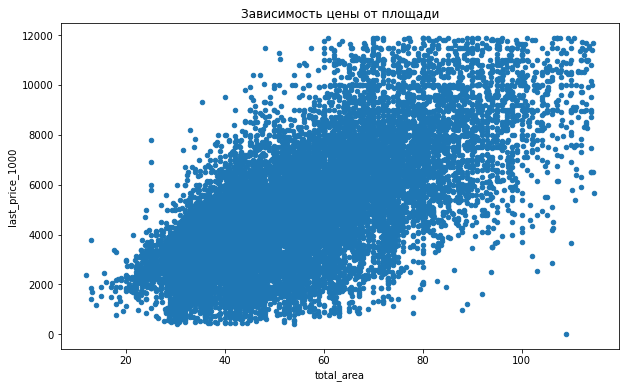

In [56]:
df_edited_v1.plot(title = 'Зависимость цены от площади', x = 'total_area', y = 'last_price_1000', kind = 'scatter', figsize = (10, 6))
print('Коэффициент корреляции (Цена - Площадь): {}'.format(df_edited_v1['total_area'].corr(df_edited_v1['last_price'].astype('float'))))

*По графикам и коэффициенту корреляции видим, что взаимосвязь между изменением общей площадью и стоимостью недвижимости (ее ростом) есть, и она не такая уж и слабая*

#### Зависимость цены от кол-ва комнат

Коэффициент корреляции (Цена - Кол-во комнат): 0.43106781280008805


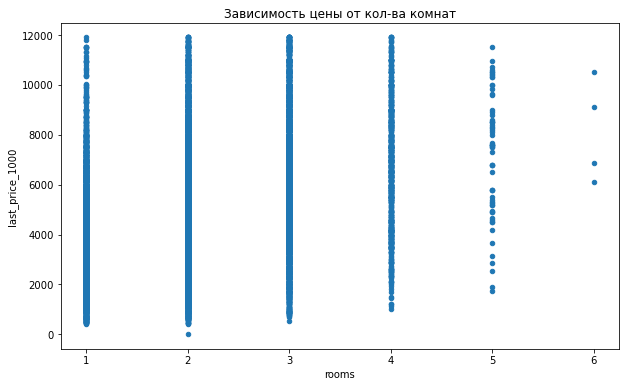

In [57]:
df_edited_v1.plot(title = 'Зависимость цены от кол-ва комнат', x = 'rooms', y = 'last_price_1000', kind = 'scatter', figsize = (10, 6))
print('Коэффициент корреляции (Цена - Кол-во комнат): {}'.format(df_edited_v1['rooms'].corr(df_edited_v1['last_price'].astype('float'))))

*Корреляция и график демонстрирует слабую завимисоть между количеством комнат и стоимостью недвижимости*

#### Зависимость цены от расстояния от центра

Коэффициент корреляции (Цена - Расстояние от центра): -0.3448701351607484


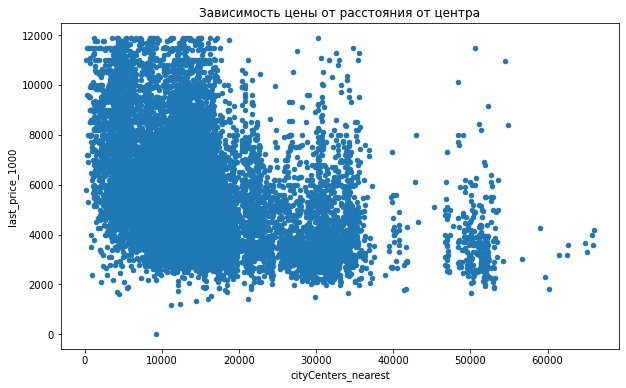

In [58]:
df_edited_v1.plot(title = 'Зависимость цены от расстояния от центра', x = 'cityCenters_nearest', y = 'last_price_1000', kind = 'scatter', figsize = (10, 6))
print('Коэффициент корреляции (Цена - Расстояние от центра): {}'.format(df_edited_v1['cityCenters_nearest'].corr(df_edited_v1['last_price'].astype('float'))))

*По коэффициенту Пирсона видим, что так же есть слабая взаимосвязь между расстоянием от центра и ценой – к цетру дороже. Большинство объектов недвижимости находятся недалеко от центра. Основная часть дорогих объектов ожидаемо ближе к центру*

#### Зависимость цены от типа этажа

In [59]:
df_edited_v1[['floor_type', 'last_price_1000']].pivot_table(index='floor_type', values='last_price_1000')

,last_price_1000
floor_type,
Другой этаж,5009.698841
Первый этаж,4083.065076
Последний этаж,4440.239656


<AxesSubplot:title={'center':'last_price_1000'}, xlabel='floor_type'>

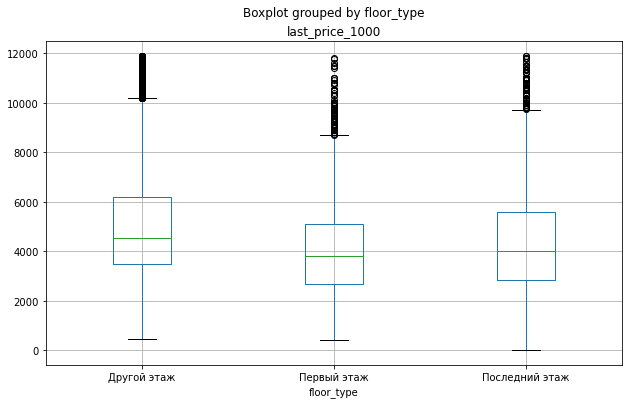

In [60]:
df_edited_v1.boxplot('last_price_1000', by='floor_type', figsize = (10, 6))

*Первый этаж – самый дешевый, на последнем этаже селятся не все, а этажи между первым и последним, как правило, самые популярные*

*Почему так происходит? Обычно под 1 этажами находятся ком. недвижимости, что приносят дискомфорт жильцам. На последних этажах возможны проблемы с крышей, в дождливые погоды возможны протечки потолка)*

#### Зависимость стоимости недвижимости от даты публикации объявления

In [61]:
df_edited_v1[['weekday', 'month', 'year', 'last_price_1000']].corr()

,weekday,month,year,last_price_1000
weekday,1.000000,0.010782,-0.002778,-0.014968
month,0.010782,1.000000,-0.268467,0.005705
year,-0.002778,-0.268467,1.000000,0.005946
last_price_1000,-0.014968,0.005705,0.005946,1.000000


*Связи между днями недели, месяцами, годами публикации и стоимостью недвижимости нет. Коэффициент Пирсона практически равен 0. Из трех признаков только день недели чуть-чуть выделяется. К слову, из таблицы корреляции мы видим связь между месяцем и годом*

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [62]:
print(df_edited_v1['locality_name'].value_counts().head(10))
df_top10_locality = df_edited_v1.query('locality_name == "Санкт-Петербург" | locality_name == "Мурино" | locality_name == "поселок Шушары" | locality_name == "Кудрово" | locality_name == "Пушкин" | locality_name == "Колпино" | locality_name == "посёлок Парголово" | locality_name == "Гатчина" | locality_name == "Всеволожск" | locality_name == "Выборг"')
avr_price_per_area_top10_locality = df_top10_locality.pivot_table(index = 'locality_name', values = 'price_per_area', aggfunc = 'mean')
avr_price_per_area_top10_locality.columns = ['avr_price_per_area']
display(round(avr_price_per_area_top10_locality, 2))
display(df_top10_locality.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = ['min', 'max']))

Санкт-Петербург      13629
Мурино                 590
Кудрово                470
поселок Шушары         437
Всеволожск             394
Пушкин                 337
Колпино                335
поселок Парголово      326
Гатчина                303
Выборг                 228
Name: locality_name, dtype: int64


,avr_price_per_area
locality_name,
Всеволожск,67221.96
Выборг,58225.20
Гатчина,68663.58
Колпино,75221.44
Кудрово,95151.62
Мурино,86087.06
Пушкин,100493.53
Санкт-Петербург,105736.31
поселок Шушары,78704.43


,min,max
,last_price,last_price
locality_name,,
Всеволожск,965780,10890000
Выборг,600000,8000000
Гатчина,850000,9500000
Колпино,2100000,8600000
Кудрово,1800000,10898000
Мурино,1730000,8500000
Пушкин,1990000,11900000
Санкт-Петербург,12190,11900000


*Населенный пункт из топ 10 по объявлениям с наименьшей стоимостью за жилье является Выборг, а самым дорогим - СпБ*

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

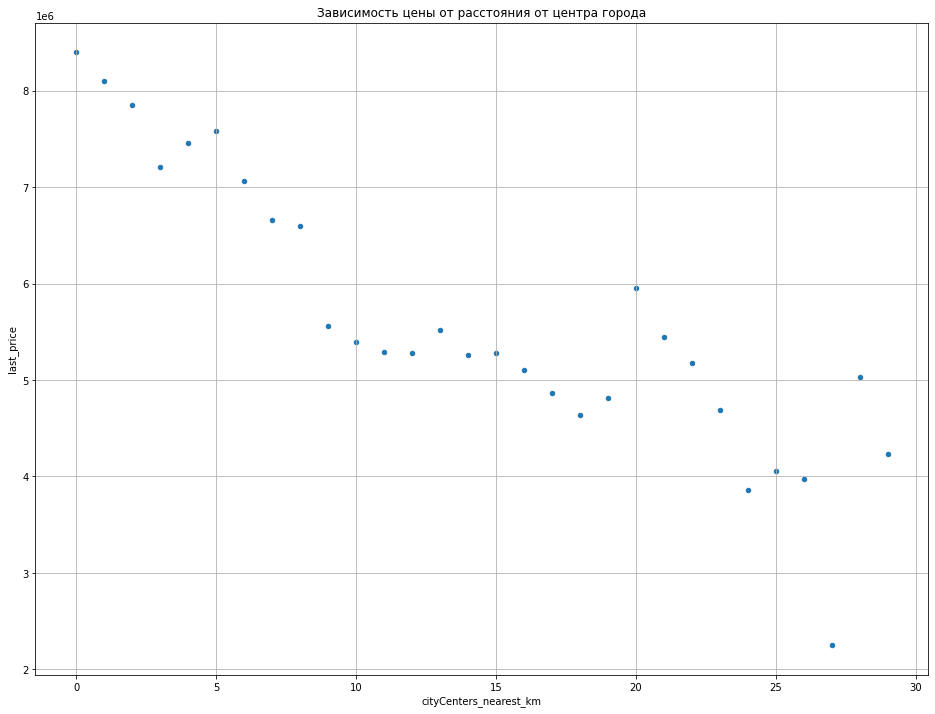

In [63]:
df_spb = df_edited_v1.query('locality_name == "Санкт-Петербург"').copy()
df_spb = df_spb.reset_index(drop = True)
df_spb['cityCenters_nearest_km'] = round(df_spb['cityCenters_nearest'] / 1000, 0)
spb_price = df_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')

(
    pd.DataFrame(spb_price.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price', title = 'Зависимость цены от расстояния от центра города', kind='scatter', grid=True, figsize = (16, 12))
)
plt.show()

*Из результата видно, что цена падает в зависимости от увеличения расстояния от центра города. Сильное падение происходит после 8 км. За границу области возьмем 8 км. Рост после 19 км связан скорее всего с элит районом или это одна из аномальных величин, но в целом снова цена падает после 20 км.*

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

#### Проанализируем объекты, которые попали в область центра

In [64]:
df_spb_centre = df_spb.query('cityCenters_nearest_km <= 8').copy()
df_spb_centre.reset_index(drop = True)
df_spb_centre[['total_area', 'last_price_1000', 'rooms', 'ceiling_height', 'cityCenters_nearest']].describe()

,total_area,last_price_1000,rooms,ceiling_height,cityCenters_nearest
count,2679.000000,2679.000000,2679.000000,1711.000000,2679.000000
mean,63.389037,7218.789284,2.238149,3.034103,5247.751027
std,20.746899,2177.414482,0.937171,1.218334,1981.268974
min,12.000000,1600.000000,1.000000,2.400000,208.000000
25%,46.400000,5600.000000,2.000000,2.720000,3928.000000
50%,61.900000,7066.624000,2.000000,3.000000,5164.000000
75%,78.000000,8821.000000,3.000000,3.200000,6836.000000
max,114.200000,11900.000000,6.000000,32.000000,8499.000000


*Средняя площадь 64 кв.м.*

*Средная цена 7.3 млн.*

*Среднее кол-во комнат между 2 и 3. Значит больше всего объявлений по 2х и 3х комнатным*

*Средняя высота потолка 3.0 м (Почти что премиум класс :D)*

*В целом данные выгладят правдоподобно, значит ранее, когда мы делали срез без выбросов получился правильным*

#### Выделим факторы, влияющие на стоимость квартиры

In [65]:
df_spb_centre[['total_area', 'rooms', 'ceiling_height', 'floor', 'days_exposition', 'cityCenters_nearest', 'weekday', 'month', 'year', 'last_price_1000']].corr().sort_values(by = 'last_price_1000', ascending=False)

,total_area,rooms,ceiling_height,floor,days_exposition,cityCenters_nearest,weekday,month,year,last_price_1000
last_price_1000,0.713717,0.454926,0.062445,0.133030,0.155511,-0.177134,0.012333,-0.010981,-0.014941,1.000000
total_area,1.000000,0.794844,0.067113,-0.055654,0.143342,-0.203931,-0.014309,0.012423,-0.090222,0.713717
rooms,0.794844,1.000000,0.020567,-0.152633,0.085343,-0.192618,-0.027659,0.014491,-0.050432,0.454926
days_exposition,0.143342,0.085343,0.004063,0.001691,1.000000,-0.073913,-0.040245,-0.056391,-0.641472,0.155511
floor,-0.055654,-0.152633,-0.079446,1.000000,0.001691,0.286290,0.048706,0.002393,-0.009760,0.133030
ceiling_height,0.067113,0.020567,1.000000,-0.079446,0.004063,-0.094327,-0.020805,-0.001209,0.024542,0.062445
weekday,-0.014309,-0.027659,-0.020805,0.048706,-0.040245,0.018421,1.000000,0.044285,0.009544,0.012333
month,0.012423,0.014491,-0.001209,0.002393,-0.056391,-0.023826,0.044285,1.000000,-0.230442,-0.010981
year,-0.090222,-0.050432,0.024542,-0.009760,-0.641472,0.057980,0.009544,-0.230442,1.000000,-0.014941
cityCenters_nearest,-0.203931,-0.192618,-0.094327,0.286290,-0.073913,1.000000,0.018421,-0.023826,0.057980,-0.177134


*Видно, что в центре аналогичное влияние на цену. Единственное различие это идет с расстояние от центра. Здесь зависимость маленькая, так как квартиры и так находятся в области центра*

#### Площадь

In [66]:
df_spb_centre['total_area'].describe()

count    2679.000000
mean       63.389037
std        20.746899
min        12.000000
25%        46.400000
50%        61.900000
75%        78.000000
max       114.200000
Name: total_area, dtype: float64

<AxesSubplot:>

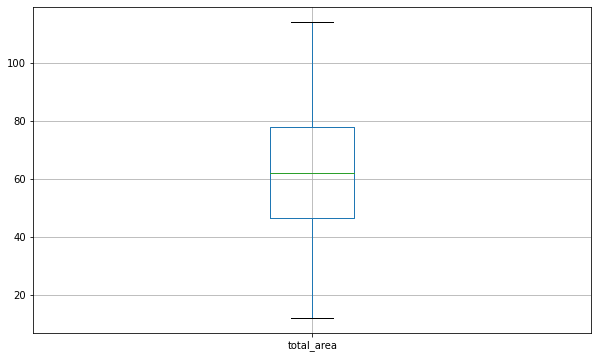

In [67]:
plt.figure(figsize=(10,6))
df_spb_centre.boxplot('total_area')

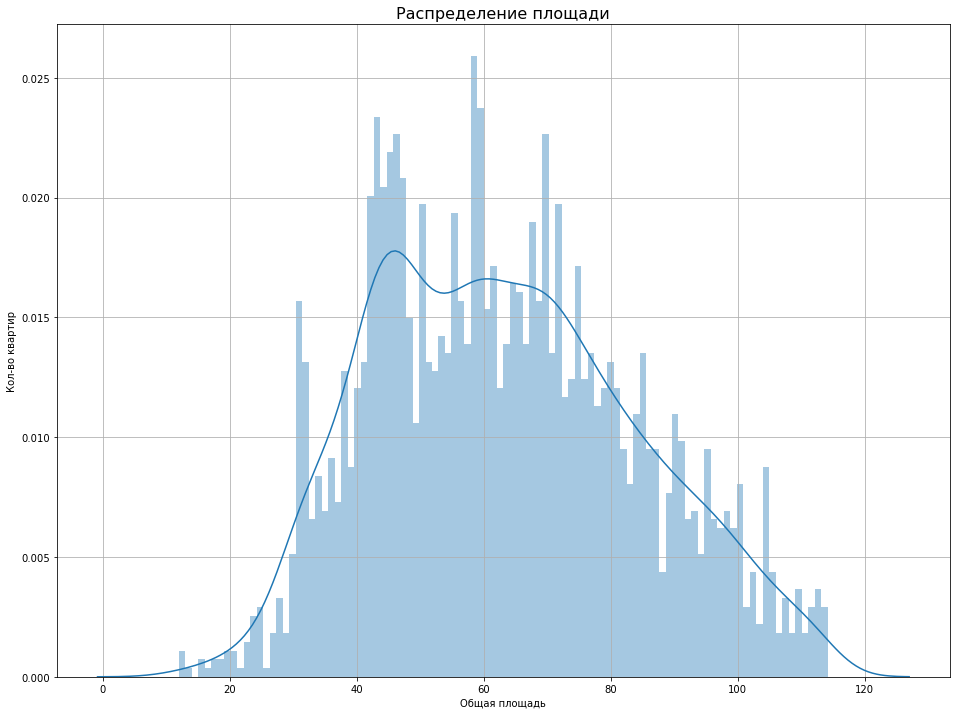

In [68]:
hist(df_spb_centre, 'total_area', 'Распределение площади', 100, 'Общая площадь', 'Кол-во квартир')

*Видно, что в центре спросом пользуются квартиры с площадью от 47 - 79 кв.*

#### Цена

In [69]:
df_spb_centre['last_price_1000'].describe()

count     2679.000000
mean      7218.789284
std       2177.414482
min       1600.000000
25%       5600.000000
50%       7066.624000
75%       8821.000000
max      11900.000000
Name: last_price_1000, dtype: float64

<AxesSubplot:>

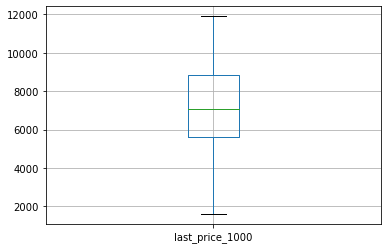

In [70]:
df_spb_centre.boxplot('last_price_1000')

8500.0    54
7500.0    53
6500.0    50
8000.0    46
9000.0    37
Name: last_price_1000, dtype: int64


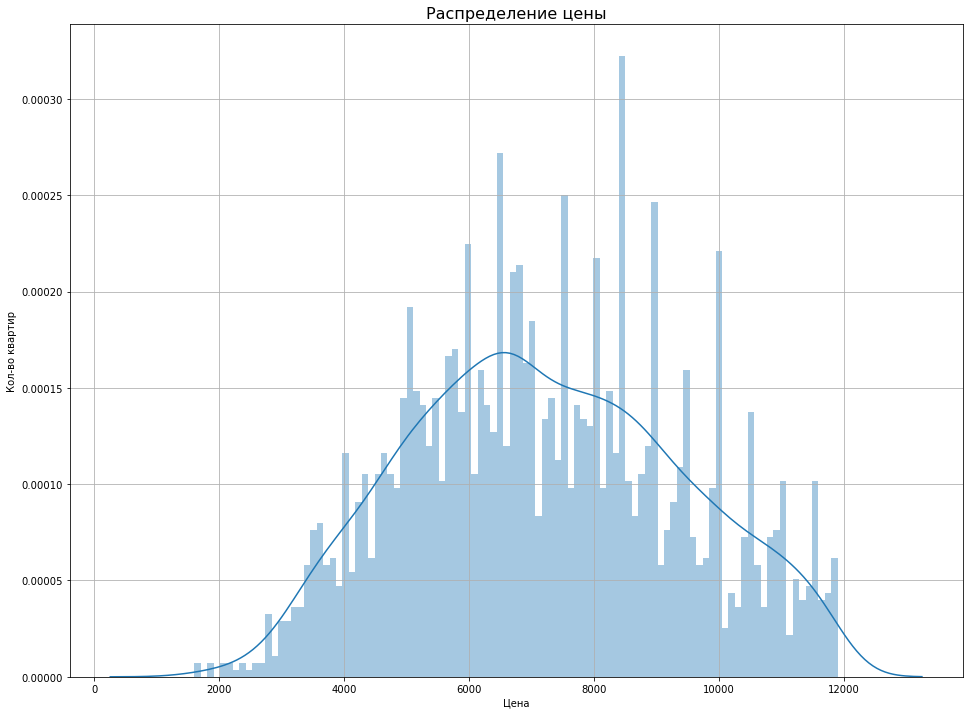

In [71]:
print(df_spb_centre['last_price_1000'].value_counts().head())
hist(df_spb_centre, 'last_price_1000', 'Распределение цены', 100, 'Цена', 'Кол-во квартир')

*Видно, что цена варьируется между 5.6 и 9 млн*

#### Число комнат

In [72]:
df_spb_centre['rooms'].describe()

count    2679.000000
mean        2.238149
std         0.937171
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

<AxesSubplot:>

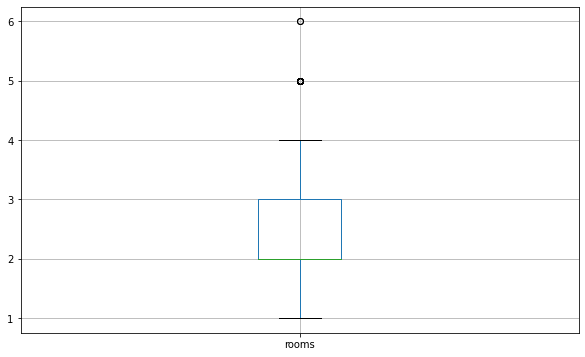

In [73]:
plt.figure(figsize=(10,6))
df_spb_centre.boxplot('rooms')

2    1031
3     771
1     638
4     214
5      23
Name: rooms, dtype: int64


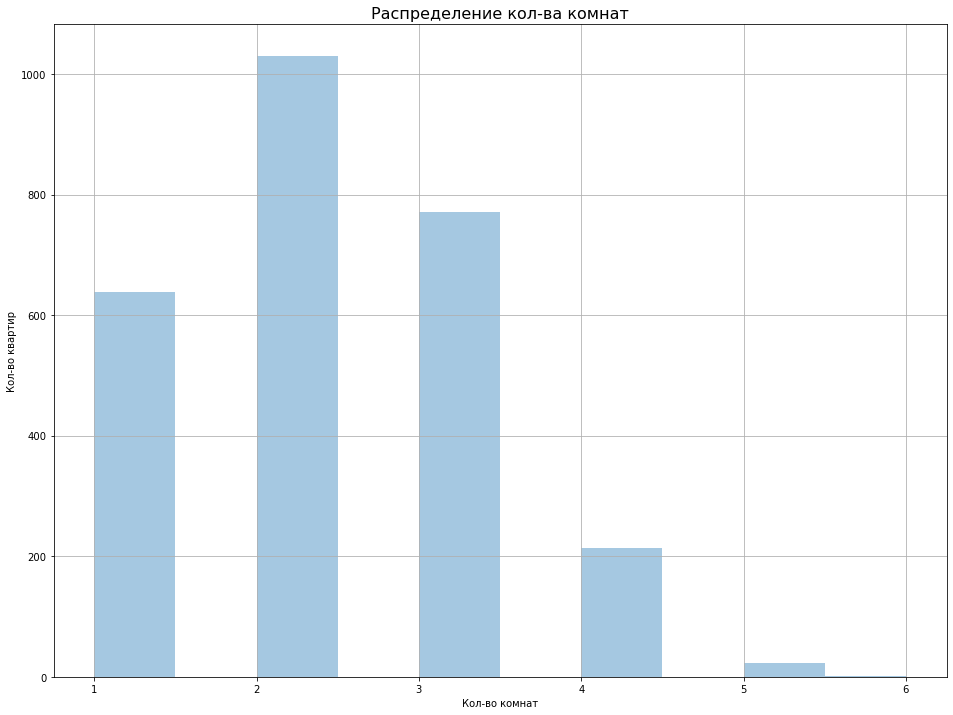

In [74]:
print(df_spb_centre['rooms'].value_counts().head())
hist(df_spb_centre, 'rooms', 'Распределение кол-ва комнат', 10, 'Кол-во комнат', 'Кол-во квартир', kde=False)

*Видно, что кол-во комнат в центре это в основном 2х и 3х комнатные*

#### Высота потолков

In [75]:
df_spb_centre['ceiling_height'].describe()

count    1711.000000
mean        3.034103
std         1.218334
min         2.400000
25%         2.720000
50%         3.000000
75%         3.200000
max        32.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

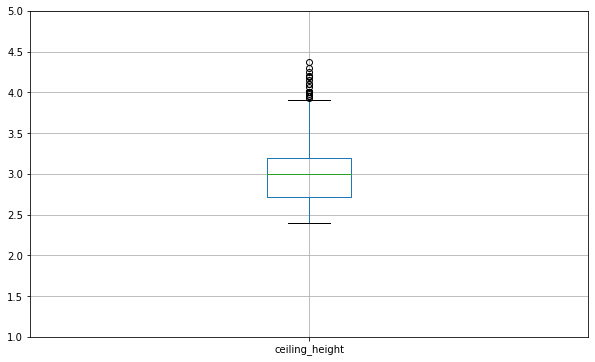

In [76]:
plt.figure(figsize=(10,6))
plt.ylim(1, 5)
df_spb_centre.boxplot('ceiling_height')

3.0    299
2.5    152
2.7    126
3.2    120
2.8    115
Name: ceiling_height, dtype: int64


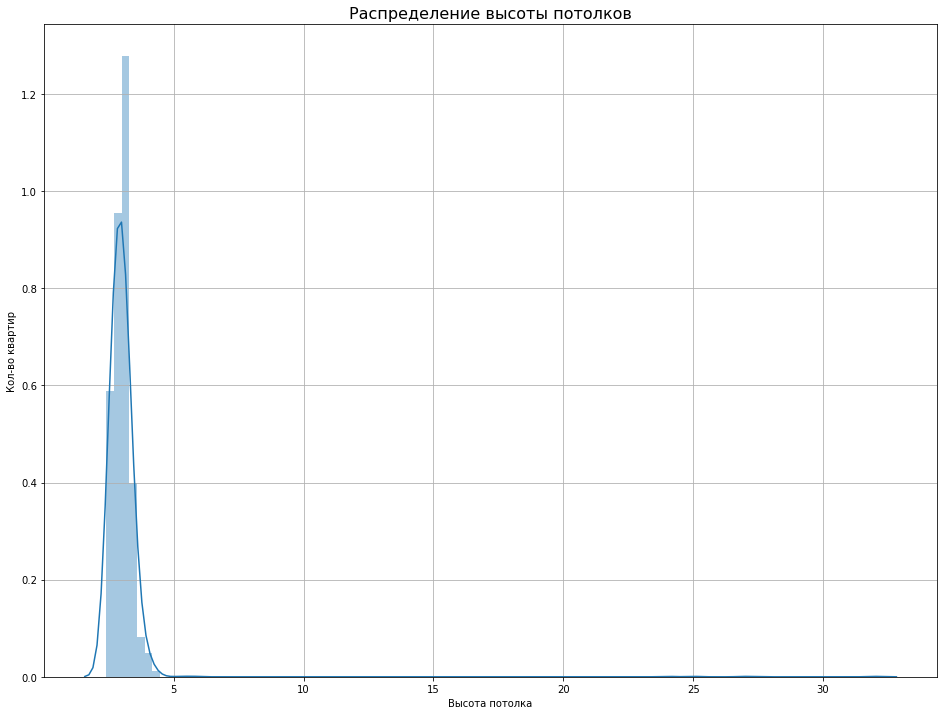

In [77]:
print(df_spb_centre['ceiling_height'].value_counts().head())
hist(df_spb_centre, 'ceiling_height', 'Распределение высоты потолков', 100, 'Высота потолка', 'Кол-во квартир')

*В основном в центре города квартиры имеют потолки с высотой от 2.7 до 3.2м, в среднем 3 м*

#### Зависимость цены от числа комнат

<AxesSubplot:title={'center':'Зависимость цены от числа комнат'}, xlabel='rooms', ylabel='last_price_1000'>

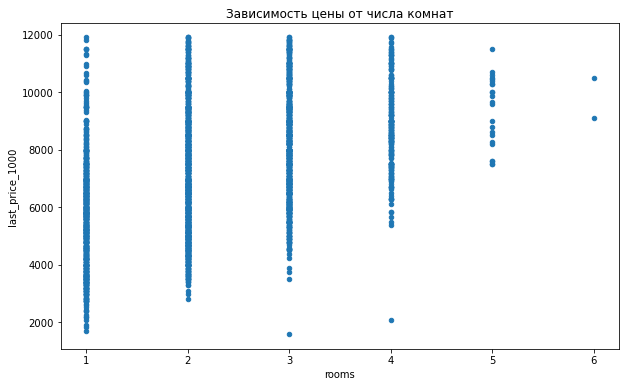

In [78]:
df_spb_centre.plot(title = 'Зависимость цены от числа комнат', x = 'rooms', y = 'last_price_1000', kind = 'scatter', figsize = (10, 6))

*Как видно из графика и таблицы, которую получили раннее, зависимость присутствует*

#### Зависимость цены от типа этажа

In [79]:
df_spb_centre.pivot_table(index='floor_type', values='last_price_1000', aggfunc = ['count', 'mean', 'max'])

,count,mean,max
,last_price_1000,last_price_1000,last_price_1000
floor_type,,,
Другой этаж,1880,7423.450899,11900.0
Первый этаж,363,6135.929441,11500.0
Последний этаж,436,7237.858748,11900.0


<AxesSubplot:title={'center':'last_price_1000'}, xlabel='floor_type'>

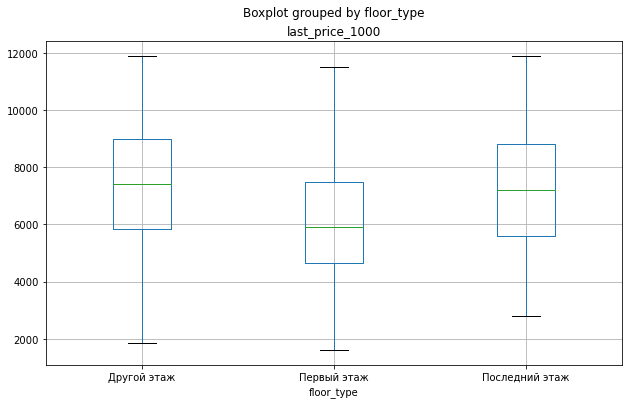

In [80]:
df_spb_centre.boxplot('last_price_1000', by='floor_type', figsize = (10, 6))

*Как и в случае с недвижимостью по всем населенным пунктам, в Петербурге в центре все также самый дешевый этаж – это первый, а дорогой - другой этаж (ни первый и ни последний)*

#### Зависимость цены от расстояния от центра

<AxesSubplot:title={'center':'Зависимость цены от расстояния от центра'}, xlabel='cityCenters_nearest', ylabel='last_price_1000'>

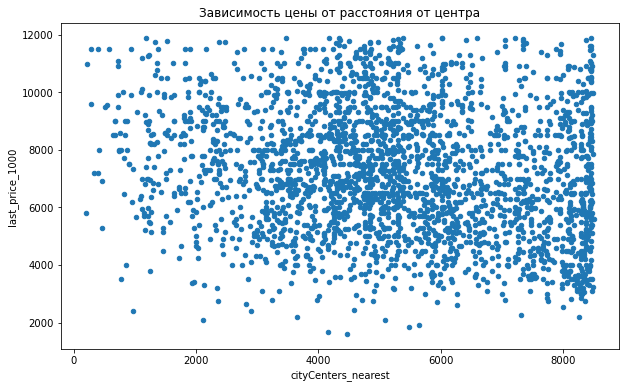

In [81]:
df_spb_centre.plot(title = 'Зависимость цены от расстояния от центра', x = 'cityCenters_nearest', y = 'last_price_1000', kind = 'scatter', figsize = (10, 6))

*Зависимость есть, но очень маленькая. Скорее всего из-за того, что квартиры и так находятся в области центра*

*Все же на графике ее сложно заметить, чем через метод corr()*

#### Зависимость цены от даты публикации объявления

In [82]:
df_spb_centre[['weekday', 'month', 'year', 'last_price_1000']].corr()

,weekday,month,year,last_price_1000
weekday,1.000000,0.044285,0.009544,0.012333
month,0.044285,1.000000,-0.230442,-0.010981
year,0.009544,-0.230442,1.000000,-0.014941
last_price_1000,0.012333,-0.010981,-0.014941,1.000000


*Аналогичная ситуация - зависимость цены от даты отсутствует*

*В целом картинка такая:*

1. *Цена сильно зависит от общей площади и кол-во комнат (логично, ведь квадратура увеличевается)*
2. *Цена не сильно зависит от расстояния от центра города, так как квартира и так попадает в область центра*
3. *В центре города цены не сильно зависят от этажа*
4. *Видно, что в основном в объявлении находятся квартиры ни 1 и ни последнего этажей, а на этажах между 1 и последним*
5. *Цена не зависит от даты размещения*

### Шаг 5. Общий вывод

### Шаг 1. Изучение данных
1. *Было выявлено 14 строк с пропущенным данными, которые в дальнейшем были либо исправлены, либо остались неизмененными, либо удалены в зависимости от природы пропуски и критерия важности этих данных*
2. *Были выявлены 0-ые значения в столбце "rooms"*
3. *Отсутствуют дубликаты*
4. *Столбец с названиме населенных пунктов требовал доработки. Имелись дубликаты под разными словосочетаниями*

### Шаг 2. Предобработка данных
1. *Изменили тип данных, где это было необходимо*
2. *Заполнили пропуски в столбце "living_area", умножив общюю площадь квартиры на медианное значение доли жилой площади от общей*
3. *Заполнили пропуски в столбце "is_apartment", указав все пропуски булевым значением False. Скорее всего заполняющие анкету специально не указали данный сегмент, так как думали, что раз это квартира, то в разделе апартаменты можно оставить пропуск. После заполнения пропусков, исправили тип данных на bool*
4. *Заполнили пропуски в столбце "kitchen_area" по аналогии с жилой площадью. Единственное различие, если это была студия, то мы просто ставили 0*
5. *Заполнили пропуски в столбце "balcony" значением (0). Заполняющие не указали наличие балкона, так как его там просто нет*
6. *Заполнили пропуски в столбцах "parks_around3000" и "ponds_around3000" значением (0), указав, что парков и прудов в радиусе 3000 м нет или же 0*
7. *Заполнили 0-ые значения в столбце "rooms" на 1*
8. *Провели корректировку данных в столбце 'locality_name'. Заменили все Ё на Е, вытащили по отдельности Мурино и Кудрово. Заменили все поселки городского типа и городские поселки на аббревиатуру пгт*

### Шаг 3. Посчитайте и добавьте в таблицу
*При добавлении данных, проблем не возникло*

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции
#### 1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим диаграммы для каждого параметра
- *Большая часть значений лежит в диапазоне до 70 кв.м*
- *Большая часть значений лежит в диапазоне до 7 млн, ср. цена 6.5 млн.*
- *В основном спросом пользуются однушки, двушки и трешки. Уж сильный разрыв происходит уже между 3х и 4х и тд.*
- *В среднем, параметр высоты потолков должен колебаться в пределах 2.4 - 3.2 м. Минимальная высота потолка определяется строительными нормами и правилами обычно как 2.5 м*

#### 2. Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- *Большую часть занимают объявления, у которых время продажи составило в пределах 1 - 35 дней (%31 или 6 404 объявлений). Среднее значение показывает, что квартира стоит в среднем 180 дней, медианное значение показывает, что длительность составляет 95 дней. Оптимальным временем продажи является то время, когда оно составляет 1.5 - 2 месяца, быстрым, если квартира продалась за неделю, очень долгим сроком является - 287+ дней*

#### 3. Уберем редкие и выбивающиеся значения. Опишим, какие особенности обнаружили
1. *Следует убрать квартиры, у которых потолок превышает 3.2 метров и меньше 2.4 м*
2. *Уберем данные, у которых пропущены значения в столбце 'locality_name', так как получить данные в каком населенном пункте находится квартира, мы не сможем. Поэтому эти данные следует убрать, чтобы не повлиять на результат анализа*
3. *Уберем данные, где цена равняется 12 тыс (это единственное значение, которое было меньше 400 тыс), также убрали значения, где цены превышают 12 млн*
4. *Уберем квартиры, у которых площадь меньше 12 и больше 115 кв.м.*
5. *Уберем квартиры, где комнат больше 6*
6. *Уберем квартиры, у которых застой был меньше 7 дней и больше 510 дней*

#### 4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
*Можно наблюдать следующие результаты:*
1. *Цена прямо пропорционально зависит от площади и кол-ву комнат и обратно пропорционально зависит от удаления от центра населенного пункта*

2. *Видно, что большим спросом пользуются квартиры, которые находятся на другом этаже (ни 1 и ни последний). Это связано с тем, что под 1 этажами чаще всего бывает ком. недвижимость (что создает шум, запахи и тд), а на последнем этаже бывают проблемы с потолками, так как есть вероятность протечки воды с скрыши дома*

3. *Зависимость цены от даты размещения отсутствует*

*Самое большое влияние на цену оказывает общая площадь помещения*

#### 5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.
*Самым дешевым вариантов будет - квартира из Гатчина, а дорогим - из Санкт-Петербурга*

#### 6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
*цена падает в зависимости от увеличения расстояния от центра города. В центр входит облать с радиусом 5км. Одно из объяснений того, что после 7км идет увеличение цены - это вероятность того, что квартира/дом находится в элит. районе, потому что после снова идет падение цены с увеличением расстояния*

#### 7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
*В целом картинка такая:*

1. *Цена сильно зависит от общей площади и кол-во комнат (логично, ведь квадратура увеличевается)*
2. *Цена не сильно зависит от расстояния от центра города, так как квартира и так попадает в область центра*
3. *В центре города цены не сильно зависят от этажа*
4. *Видно, что в основном в объявлении находятся квартиры ни 1 и ни последнего этажей, а на этажах между 1 и последним*
5. *Цена не зависит от даты размещения*